## Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define path
path = r'/Users/azadeh/Documents/CitiBike Data Quest/'

In [3]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

In [4]:
df.head()

trip_id  bike_id weekday  start_hour           start_time  start_station_id  \
0  LnQzQk    16013     Mon          18  2013-09-09 18:18:55               523   
1  IL9boN    15230     Thu          18  2013-09-12 18:38:53               257   
2  46clGB    17942     Wed          19  2013-09-18 19:44:04               479   
3  v7vdFt    19683     Sat          11  2013-09-28 11:54:37               527   
4  VGBsb5    18024     Sat          18  2013-09-07 18:08:22               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

              end_time  end_station_id     end_station_name  \
0  2013-09-09 18:35:28             334      W 20 St & 7 Ave   
1  2013-09-12 18:48:34             236  St Marks Pl & 2 Ave   
2  2013-09-18 19:50:05             513     W 56 St & 10 Ave   
3  2013-09-28 12:03:58             441      E 52 St & 2 Ave   
4  2013-09-07 18:46:38             476      E 31 St & 3 Ave   

   end_station_latitude  end_station_longitude  trip_duration      subscriber  \
0             40.742388             -73.997262            993      Subscriber   
1             40.728419             -73.987140            581      Subscriber   
2             40.768254             -73.988639            361      Subscriber   
3             40.756014             -73.967416            561      Subscriber   
4             40.743943             -73.979661           2296  Non-Subscriber   

   birth_year  gender  
0      1968.0       2  
1      1983.0       1  
2      1989.0       1  
3      1988.0       2  
4         NaN       0

In [5]:
df['trip_duration'].mean()

838.9829

In [6]:
df['trip_duration'].median() # Check the median

672.0

In [7]:
df['trip_duration'].max() # Check the max

2697

In [8]:
df['trip_duration'].min()

60

/var/folders/4h/rfmmvwhd05z_ywjwzkv5fv7c0000gn/T/ipykernel_34833/2108612845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trip_duration'], bins=25)


<Axes: xlabel='trip_duration', ylabel='Density'>

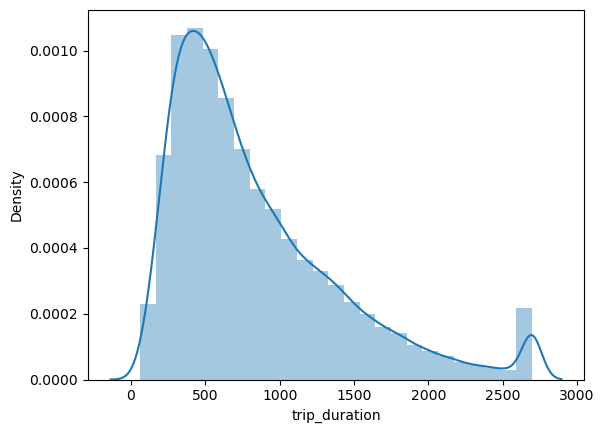

In [9]:
sns.distplot(df['trip_duration'], bins=25)

Dependent Variable:
trip_duration: This could be a reasonable choice for the dependent variable, especially if you are interested in predicting or analyzing the duration of bike trips.

Independent Variables:
start_hour: The hour when the trip started could be an independent variable. It might influence the duration or other aspects of the trip.
weekday: The day of the week could be another independent variable. Different days might have different patterns in terms of bike usage.
start_station_id: The ID of the starting station could be relevant. It might indicate 

### 3. Data prep for regression analysis 

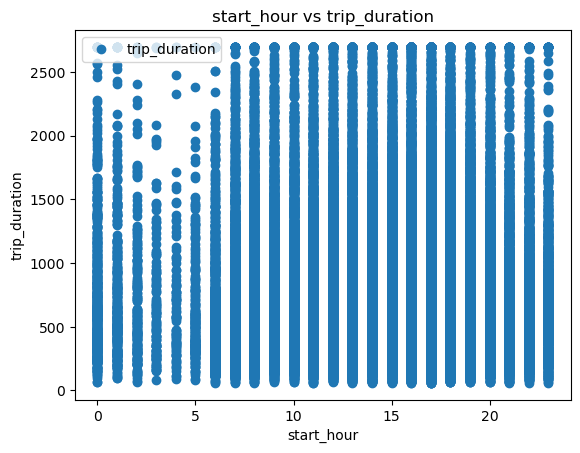

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('start_hour vs trip_duration')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [11]:
X = df['start_hour'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [12]:
X

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]])

In [13]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]])

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis


In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('start_hour vs trip_duration (Test set)')
plot_test.xlabel('start_hour')
plot_test.ylabel('trip_duration')
plot_test.show()

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.65557439]]
Mean squared error:  332413.319737807
R2 score:  0.001905259600111453


In [21]:
y_predicted

array([[861.03102025],
       [865.68659464],
       [861.03102025],
       ...,
       [861.03102025],
       [837.75314831],
       [814.47527638]])

In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual   Predicted
0      360  861.031020
1     1626  865.686595
2     1137  861.031020
3      758  847.064297
4      306  772.575107
5      670  856.375446
6      330  809.819702
7     1105  842.408723
8      213  847.064297
9      259  851.719871
10     593  851.719871
11    1868  847.064297
12     116  870.342169
13     300  823.786425
14     681  851.719871
15     282  837.753148
16    2446  851.719871
17     429  847.064297
18     520  847.064297
19     201  809.819702
20    1278  879.653318
21     492  819.130851
22     824  861.031020
23    1682  842.408723
24     838  828.442000
25     416  851.719871
26     339  814.475276
27    1241  865.686595
28    1517  837.753148
29     411  842.408723

##### Compare how the regression fits the training set

In [23]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.65557439]]
Mean squared error:  326872.9953295946
R2 score:  0.0015615156653446816


MSE is very large here. the model is not a good fit?

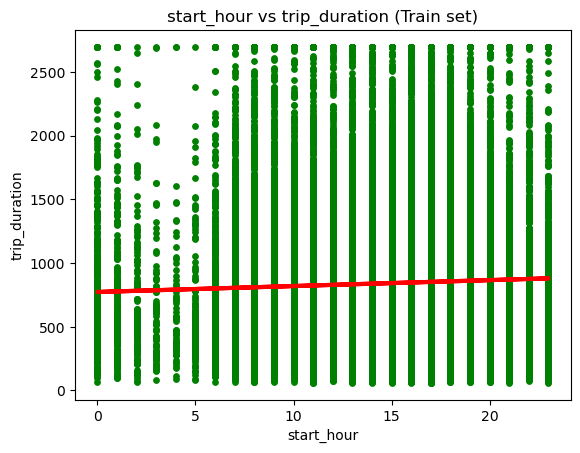

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('start_hour vs trip_duration (Train set)')
plot_test.xlabel('start_hour')
plot_test.ylabel('trip_duration')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [27]:
# Clean the extreme values from the "trip_duration" variable observed during the consistency checks.

df_test = df[df['trip_duration'] <= 60] 

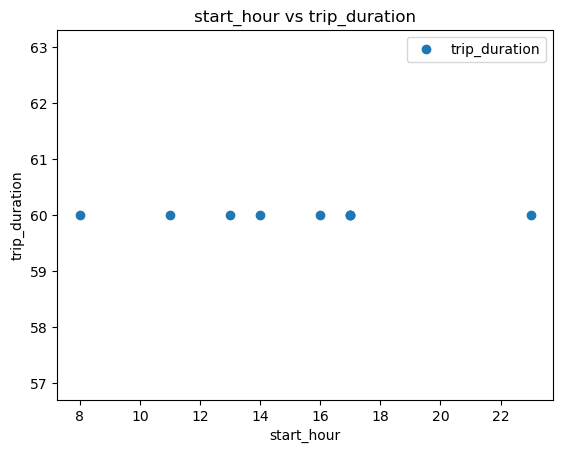

In [28]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'start_hour', y='trip_duration', style='o')  
plt.title('start_hour vs trip_duration')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()